In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv('train.csv')

# Context

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [64]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [65]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


# Data quality assessment

In [66]:
df.drop(columns=['Cabin','Ticket','PassengerId','Name'],inplace=True)

In [67]:
df['Sex'].replace({'male':1,'female':0},inplace=True)

In [68]:
df.rename(columns={'Sex':'Sex_male'},inplace=True)

In [69]:
df['Embarked'].value_counts()

S    72139
C    22187
Q     5424
Name: Embarked, dtype: int64

In [70]:
df['Embarked'].fillna('S',inplace=True)

In [71]:
df['Embarked'].replace({'S':1,'C':2,'Q':3},inplace=True)

In [73]:
age_dict = {1:df.query('Sex_male==1')['Age'].median(),
           0:df.query('Sex_male==0')['Age'].median()}

In [74]:
df['Age'].fillna(df['Sex_male'].map(age_dict),inplace=True)

In [76]:
pclass_dict = {1:df.query('Pclass==1')['Fare'].median(),
               2:df.query('Pclass==2')['Fare'].median(),
               3:df.query('Pclass==3')['Fare'].median()}

In [78]:
df['Fare'].fillna(df['Pclass'].map(pclass_dict),inplace=True)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Sex_male  100000 non-null  int64  
 3   Age       100000 non-null  float64
 4   SibSp     100000 non-null  int64  
 5   Parch     100000 non-null  int64  
 6   Fare      100000 non-null  float64
 7   Embarked  100000 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 6.1 MB


In [84]:
df.head()

,Survived,Pclass,Sex_male,Age,SibSp,Parch,Fare,Embarked
0,1,1,1,36.00,2,0,27.14,1
1,0,3,1,36.00,0,0,13.35,1
2,0,3,1,0.33,1,2,71.29,1
3,0,3,1,19.00,0,0,13.04,1
4,1,3,1,25.00,0,0,7.76,1


# Data exploration

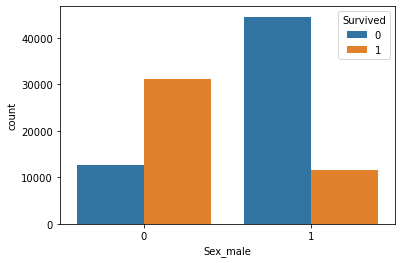

In [120]:
sns.countplot(x='Sex_male',hue='Survived',data=df);

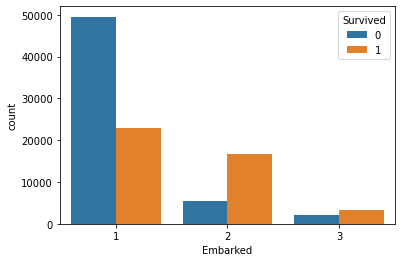

In [293]:
sns.countplot(x='Embarked',hue='Survived',data=df);

<AxesSubplot:xlabel='Pclass', ylabel='count'>

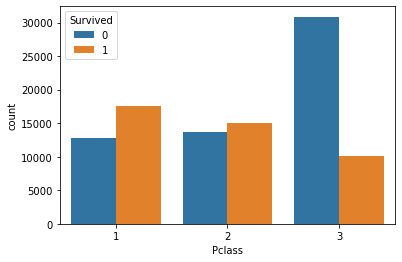

In [295]:
sns.countplot(x='Pclass',hue='Survived',data=df);

In [250]:
parch_df=df.groupby('Parch')['Survived'].sum()/df.groupby('Parch')['Survived'].count()*100

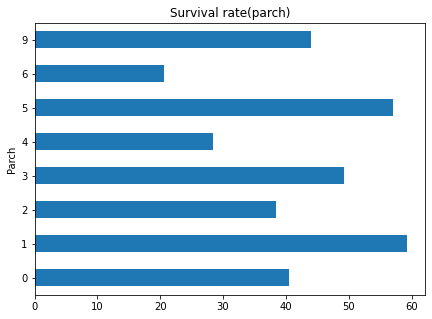

In [291]:
plt.figure(figsize=(7,5))
parch_df.plot(kind='barh')
plt.title('Survival rate(parch)');


# Summary

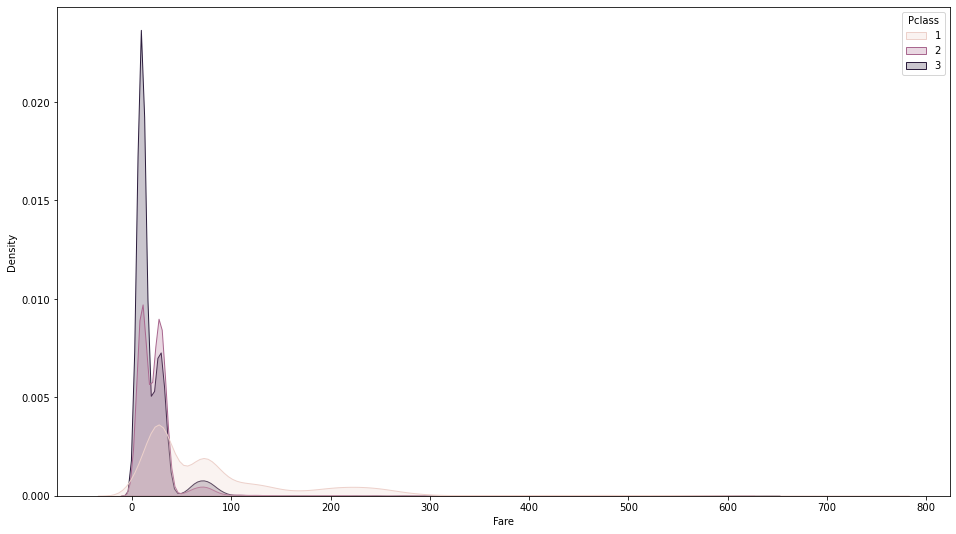

In [140]:
plt.figure(figsize=(16,9))
sns.kdeplot(data=df,x='Fare',hue='Pclass',shade=True);

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

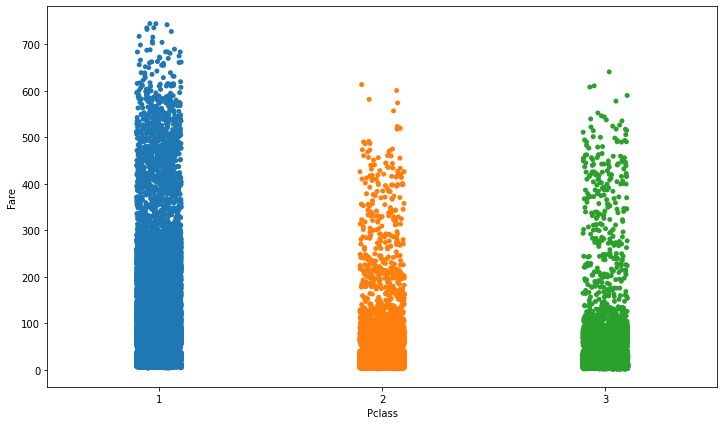

In [117]:
plt.figure(figsize=(12,7))
sns.stripplot(x='Pclass',y='Fare',data=df)

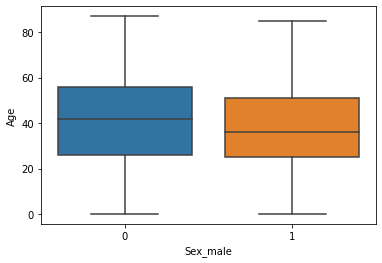

In [128]:
sns.boxplot(x='Sex_male',y='Age',data=df);

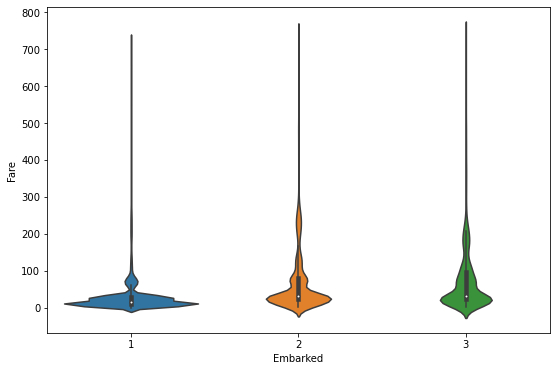

In [296]:
plt.figure(figsize=(9,6))
sns.violinplot(x='Embarked',y='Fare',data=df);

In [ ]:
Видно,что наибольший survival rate(выжившие/количество людей) будут иметь женщины,причем,вероятность выживания пассажира
увеличивается, если он находился в 1 классе(наибольшая медиана цены билетов) и сел на титаник в Cherbourg(наибольшая 
медиана цены билетов),возможно, чем выше цена билета(Fare), тем выше шансы выжить.